In [26]:
#### Tratamiento de datos ####
import pandas as pd
import numpy as np

#### Graficos ####
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Preprocesamiento y modelamiento ####
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed,cpu_count
import optuna

#### Otros ####
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
def inspeccionar_valores_nulos(df):
    # Inspección de valores nulos
    nulos = pd.DataFrame(df.isna().sum().reset_index())
    nulos = nulos.rename(columns={"index": "Variable", 0: "Nulos"})
    
    # Calcular el porcentaje de nulos
    nulos['Porcentaje Nulos'] = (nulos['Nulos'] / len(df)) * 100
    
    # Ordenar por número de nulos en orden descendente
    nulos = nulos.sort_values(by='Nulos', ascending=False)
    
    # Mostrar el resultado
    #print(nulos)
    
    return nulos

In [3]:
def get_column_types(df):
    """
    Returns two lists: one with the names of categorical columns and another with the names of numeric columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    tuple: A tuple containing two lists - (categorical_columns, numeric_columns).
    """
    categorical_columns = df.select_dtypes(include='object').columns.tolist()
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    
    return categorical_columns, numeric_columns

In [4]:
datos = pd.read_csv("Loan.csv", engine='c')

In [5]:
df = datos.copy()

In [6]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.35,1,2,0.36,0,Home,0,29,9,7632,1202,146111,19183,3329.00,0.72,11,126928,0.20,0.23,419.81,0.18,0,49.00
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.09,5,3,0.33,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.08,0.94,3,43609,0.21,0.20,794.05,0.39,0,52.00
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.14,2,0,0.24,0,Education,0,20,22,886,895,25176,128874,3393.67,0.87,6,5205,0.22,0.21,666.41,0.46,0,52.00
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.27,2,1,0.44,0,Home,0,27,10,1675,1217,104822,5370,5757.00,0.90,5,99452,0.30,0.30,1047.51,0.31,0,54.00
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.32,0,0,0.08,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.33,0.94,5,227019,0.20,0.18,330.18,0.07,1,36.00


In [7]:
inspeccionar_valores_nulos(df)

,Variable,Nulos,Porcentaje Nulos
0,ApplicationDate,0,0.00
1,Age,0,0.00
20,PaymentHistory,0,0.00
21,LengthOfCreditHistory,0,0.00
22,SavingsAccountBalance,0,0.00
23,CheckingAccountBalance,0,0.00
24,TotalAssets,0,0.00
25,TotalLiabilities,0,0.00
26,MonthlyIncome,0,0.00
27,UtilityBillsPaymentHistory,0,0.00


In [8]:
df.drop(['RiskScore','ApplicationDate'],axis=1,inplace=True)

In [9]:
categorical_columns, numeric_columns= get_column_types(df)

In [10]:
len(categorical_columns), len(numeric_columns)

(5, 29)

In [11]:
numeric_columns.remove('LoanApproved')

In [12]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,39.75,59161.47,571.61,17.52,24882.87,54.06,1.52,454.29,0.29,3.02,0.99,0.29,0.05,0.10,23.99,14.96,4946.05,1782.56,96964.40,36252.41,4891.72,0.80,5.00,72294.32,0.24,0.24,911.61,0.40,0.24
std,11.62,40350.85,51.00,11.32,13427.42,24.66,1.39,240.51,0.16,1.74,0.99,0.16,0.22,0.30,4.95,8.37,6604.89,2245.38,120799.94,47251.51,3296.77,0.12,2.24,117920.02,0.04,0.04,674.58,0.34,0.43
min,18.00,15000.00,343.00,0.00,3674.00,12.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,1.00,73.00,24.00,2098.00,372.00,1250.00,0.26,0.00,1000.00,0.13,0.11,97.03,0.02,0.00
25%,32.00,31679.00,540.00,9.00,15575.00,36.00,0.00,286.00,0.16,2.00,0.00,0.16,0.00,0.00,21.00,8.00,1541.75,551.00,31180.25,11196.75,2629.58,0.73,3.00,8734.75,0.21,0.21,493.76,0.18,0.00
50%,40.00,48566.00,578.00,17.00,21914.50,48.00,1.00,402.00,0.27,3.00,1.00,0.26,0.00,0.00,24.00,15.00,2986.00,1116.00,60699.00,22203.00,4034.75,0.82,5.00,32855.50,0.24,0.24,728.51,0.30,0.00
75%,48.00,74391.00,609.00,25.00,30835.00,72.00,2.00,564.00,0.39,4.00,2.00,0.39,0.00,0.00,27.00,22.00,5873.25,2126.00,117405.25,43146.50,6163.00,0.89,6.00,88825.50,0.26,0.27,1112.77,0.51,0.00
max,80.00,485341.00,712.00,61.00,184732.00,120.00,5.00,2919.00,0.92,13.00,7.00,0.90,1.00,1.00,45.00,29.00,200089.00,52572.00,2619627.00,1417302.00,25000.00,1.00,16.00,2603208.00,0.41,0.45,10892.63,4.65,1.00


In [13]:
#distribucion de la variable default
df.LoanApproved.value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

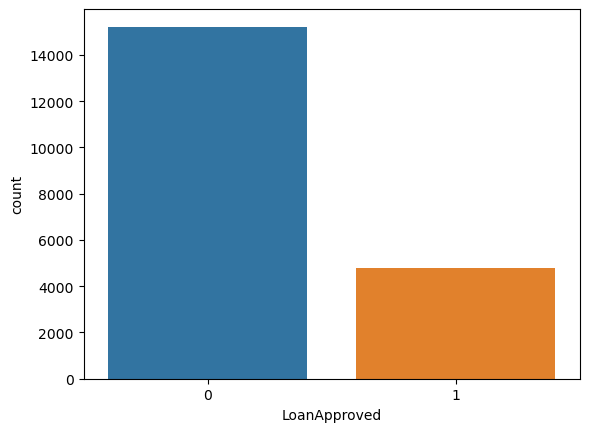

In [14]:
sns.countplot(x="LoanApproved", data=df)
plt.show()

In [15]:
media_default=df['LoanApproved'].mean().round(4)
media_default

0.239

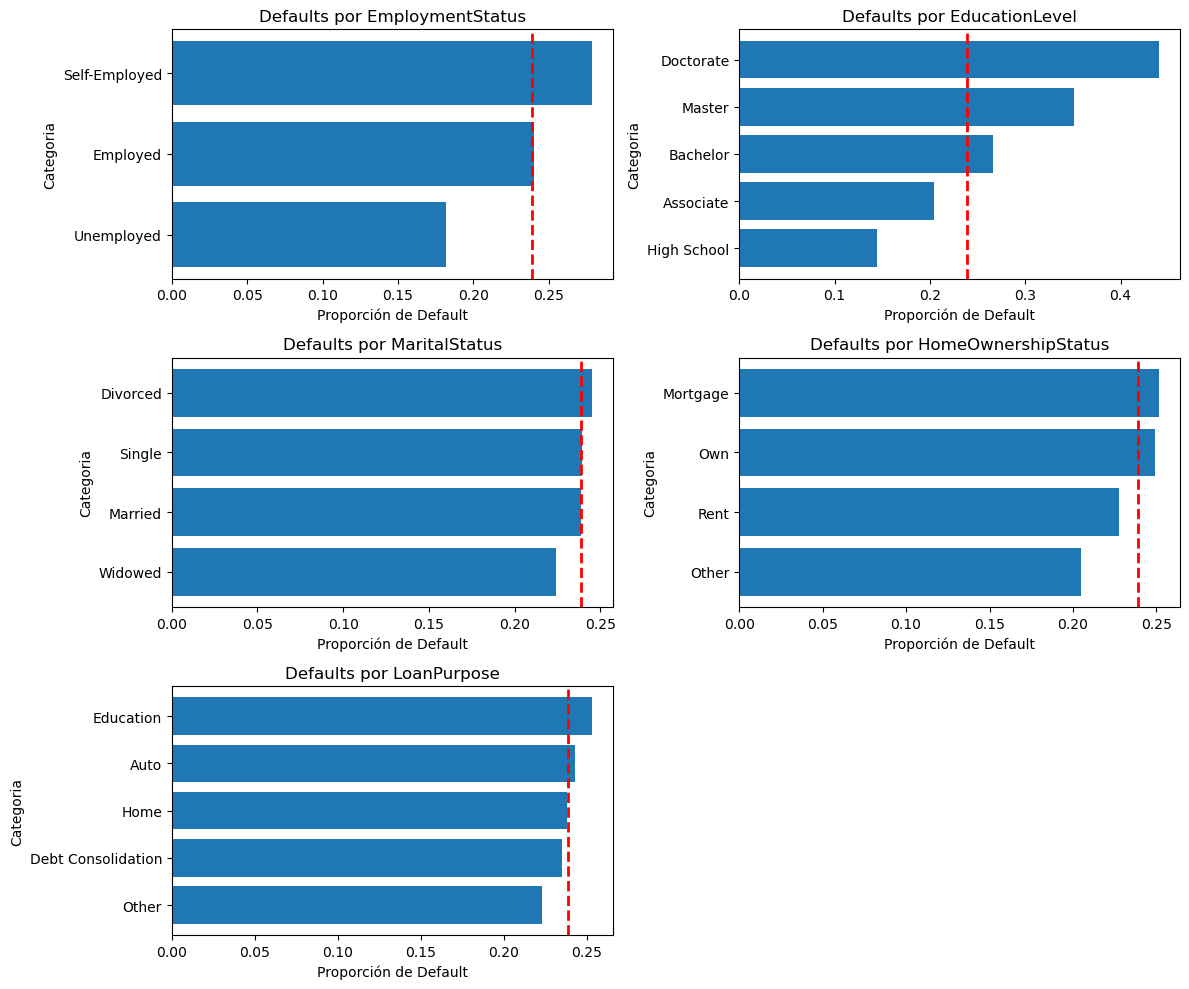

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12,10))  # 4 filas y 2 columnas

for i, category in enumerate(categorical_columns):
    if i >= len(axes.flatten()):
        break
    ax = axes.flatten()[i]
    grouped_data = df.groupby(category)['LoanApproved'].mean().sort_values(ascending=True)
    ax.barh(grouped_data.index, grouped_data.values)
    ax.set_xlabel('Proporción de Default')
    ax.set_ylabel('Categoria')
    ax.set_title(f'Defaults por {category}')
    
        # Agregar la línea del promedio
    ax.axvline(media_default, color='red', linestyle='--', linewidth=2, label=f'Prom.: {media_default:.2f}')

# Eliminar los gráficos vacíos si hay menos de 8 categorías
if len(categorical_columns) < len(axes.flatten()):
    for j in range(len(categorical_columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

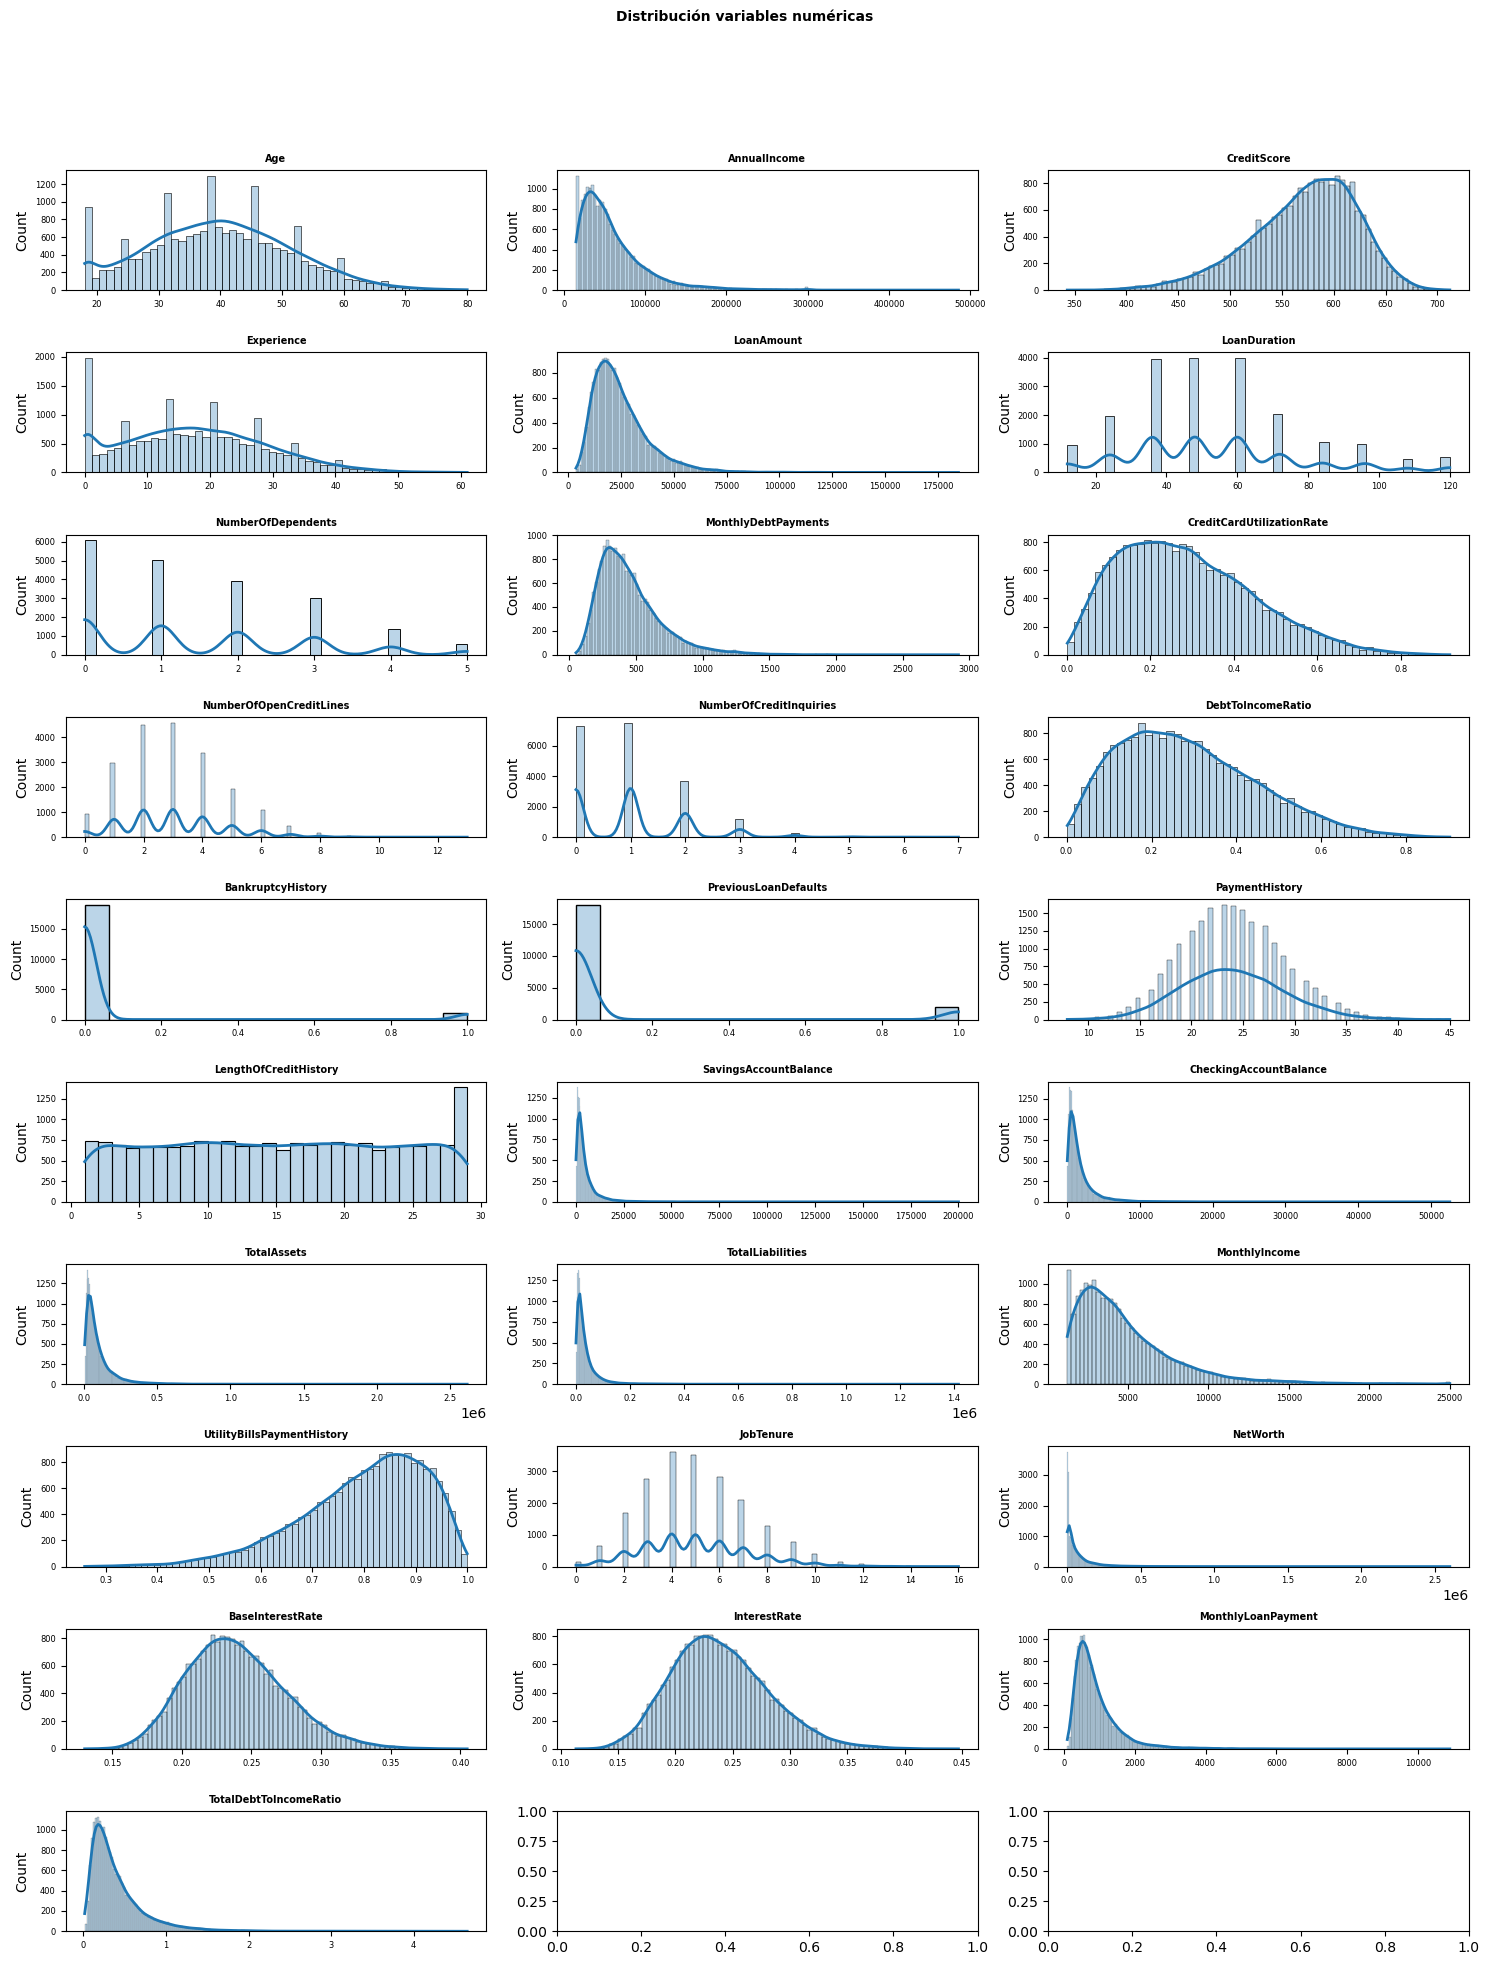

In [17]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 20))
axes = axes.flat

for i, colum in enumerate(numeric_columns):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        #color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

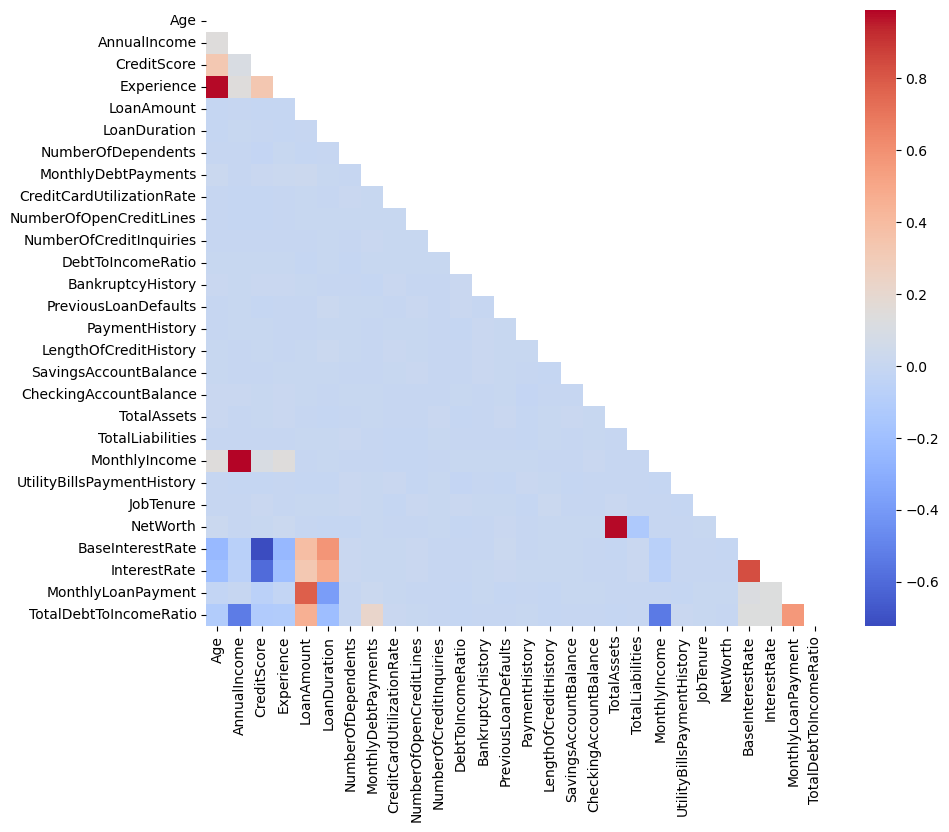

In [58]:
plt.figure(figsize= (10,8))
correlaciones = df[numeric_columns].corr()
upp_mat = np.triu(correlaciones)
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat,annot_kws={"size": 2})
plt.show()

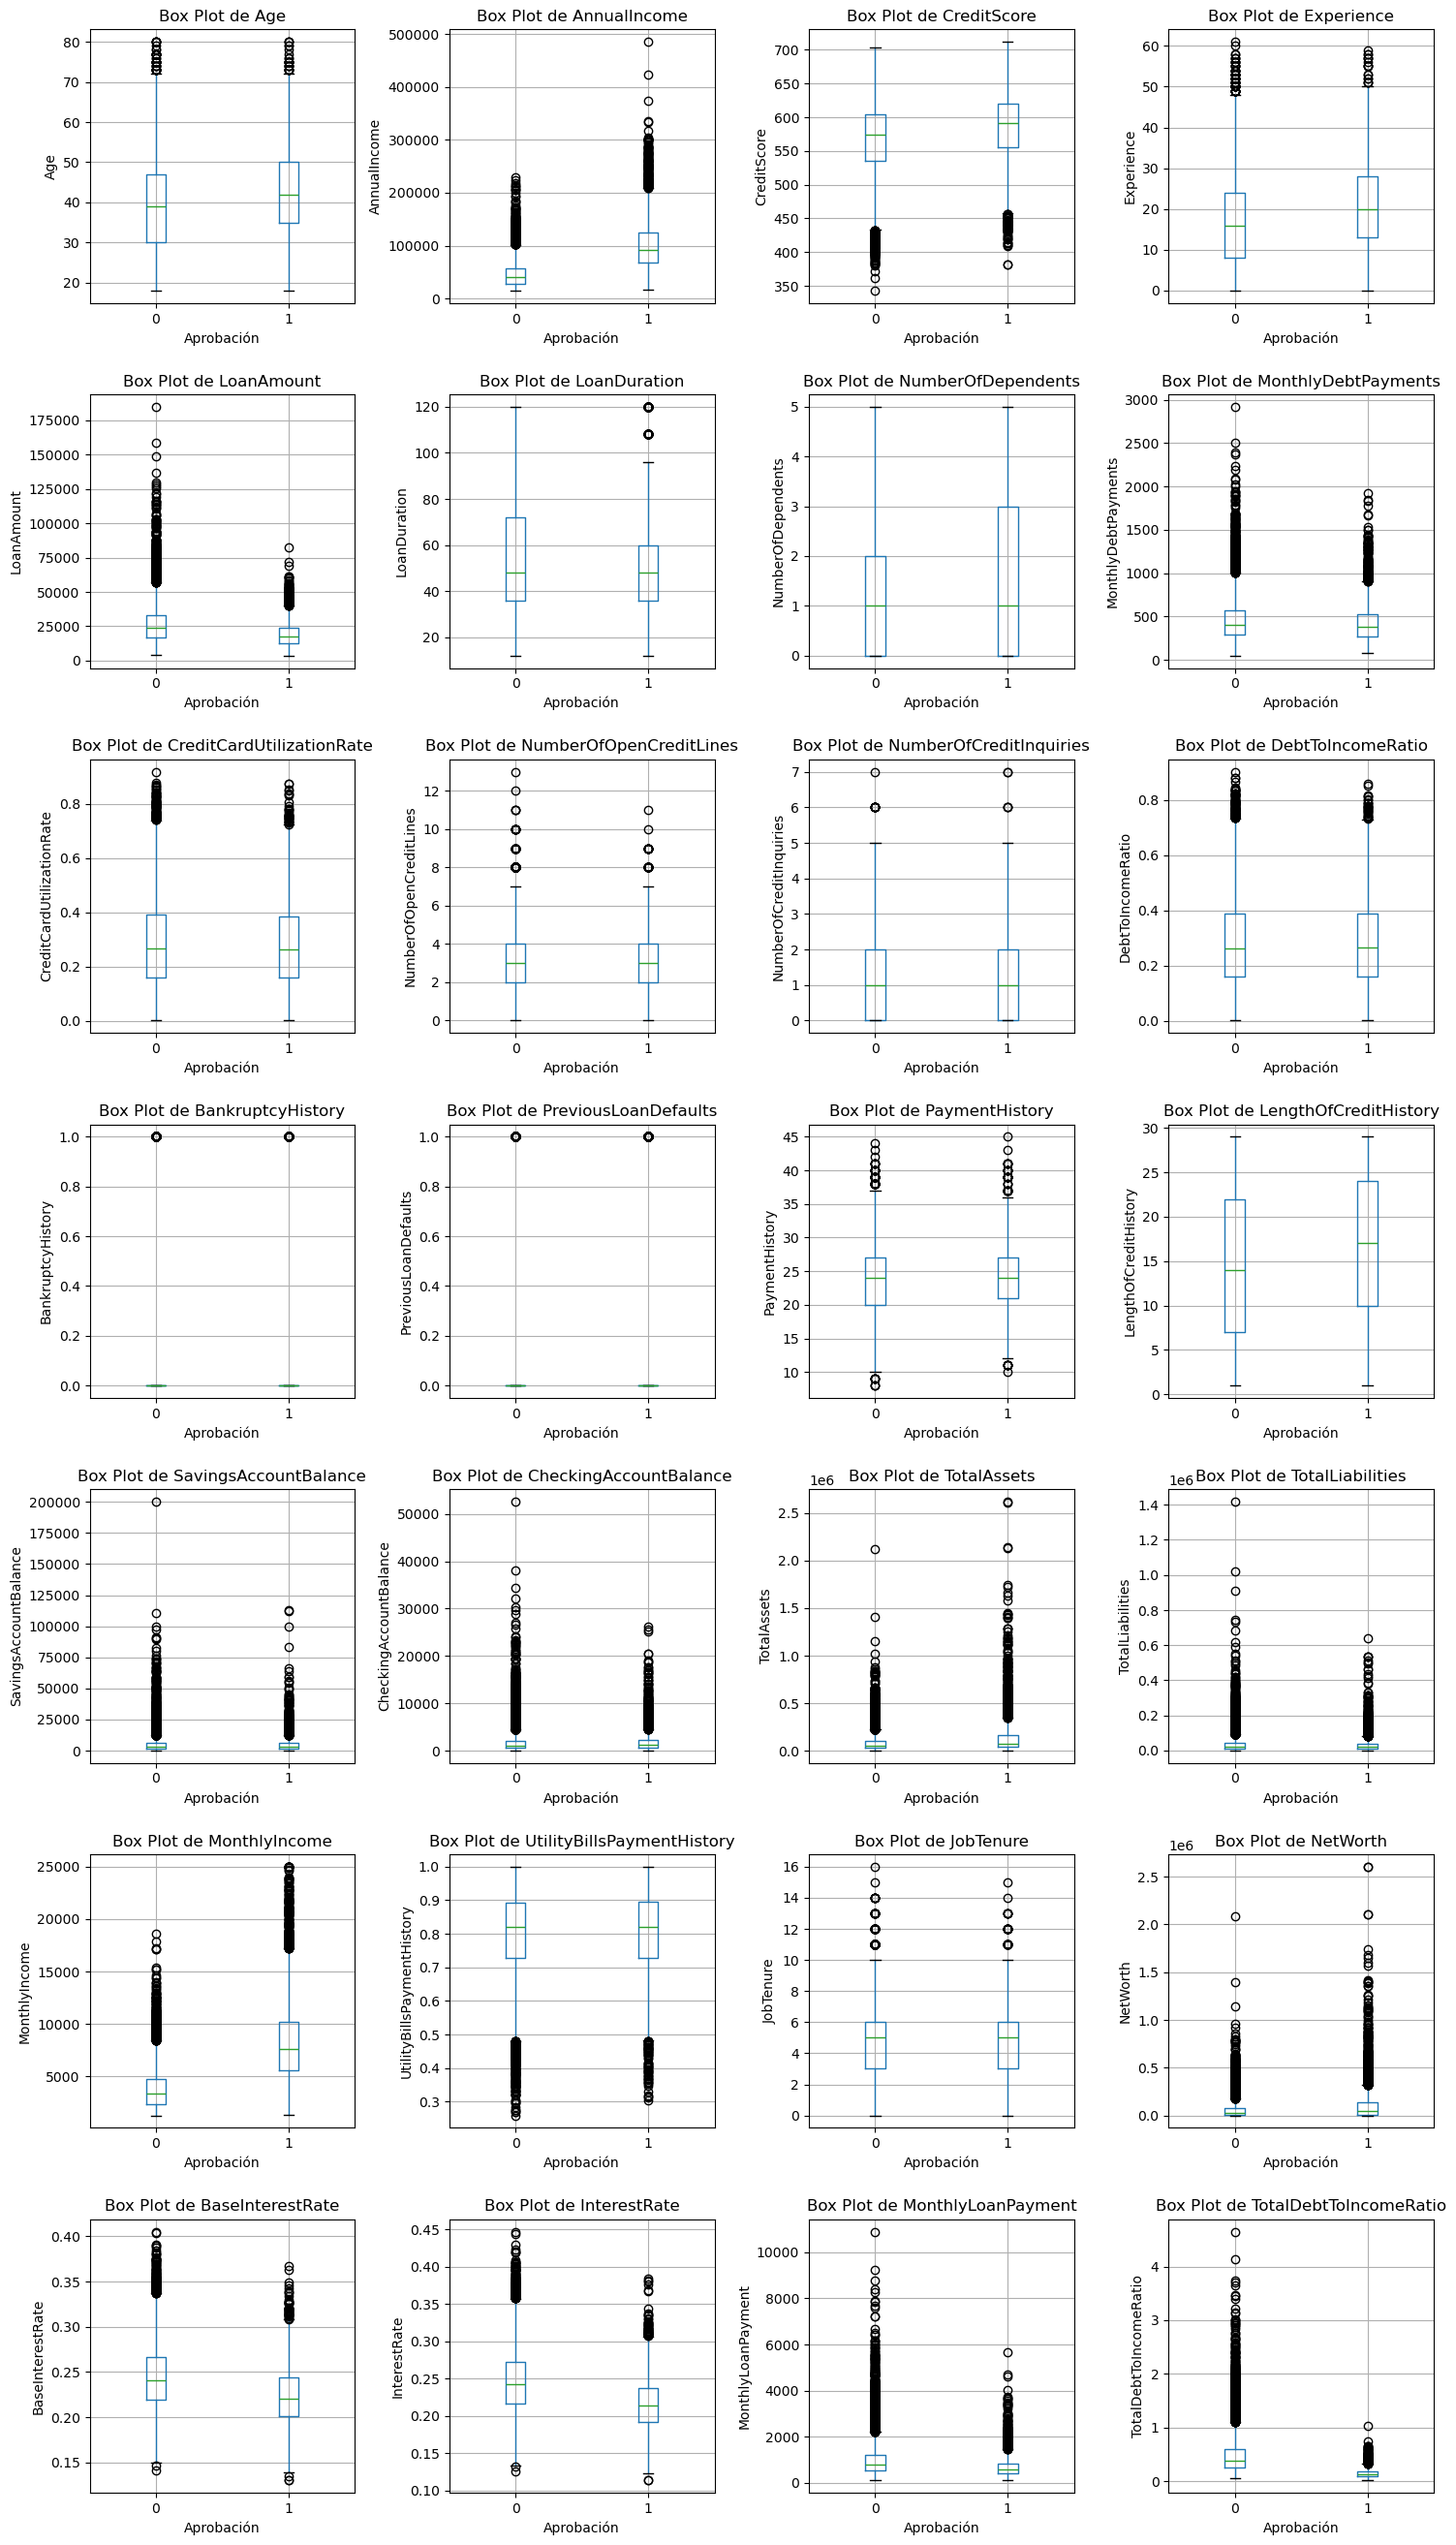

In [57]:
fig, axes = plt.subplots(8, 4, figsize=(15, 30))  # 6 filas y 2 columnas

for i, var in enumerate(numeric_columns):
    if i >= len(axes.flatten()):
        break
    ax = axes.flatten()[i]
    df.boxplot(column=var, by='LoanApproved', ax=ax)
    ax.set_title(f'Box Plot de {var}')
    ax.set_xlabel('Aprobación')
    ax.set_ylabel(var)

# Eliminar los gráficos vacíos si hay menos de 12 gráficos
if len(numeric_columns) < len(axes.flatten()):
    for j in range(len(numeric_columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.suptitle('')  # Eliminar el título general que añade pandas por defecto
plt.show()

### Regresión logística

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = 'LoanApproved'),
                                        df['LoanApproved'],
                                        random_state = 123,
                                        stratify=df['LoanApproved']
                                    )

In [19]:
X_train.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
8267,27,34801,549,Employed,Bachelor,5,31973,60,Single,4,Rent,228,0.33,3,4,0.27,0,Home,0,21,9,1214,647,9378,9740,2900.08,0.88,2,6474,0.26,0.29,1012.06,0.43
2318,33,40709,611,Employed,High School,10,56354,36,Married,4,Own,562,0.06,3,1,0.31,0,Auto,0,17,20,2748,522,28132,11222,3392.42,0.85,6,16910,0.24,0.24,2212.99,0.82
11550,55,28898,591,Employed,High School,34,12386,36,Single,1,Other,793,0.68,2,0,0.27,0,Home,0,24,29,8245,1904,15362,16919,2408.17,0.60,6,7387,0.20,0.19,455.18,0.52
14444,35,56121,584,Employed,Bachelor,12,33695,48,Single,0,Own,286,0.26,2,1,0.17,0,Home,1,23,12,4150,6119,92299,22512,4676.75,0.57,4,69787,0.24,0.24,1095.30,0.30
19013,26,212635,599,Employed,High School,5,10959,36,Single,0,Rent,1083,0.17,3,0,0.14,0,Home,1,19,11,7861,507,46294,15485,10982.08,0.90,5,30809,0.20,0.20,406.86,0.14


In [20]:
#listas con variables numericas y categoricas
categorical_columns, numeric_columns = get_column_types(X_train)

In [23]:
preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_columns),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)],
                remainder = 'passthrough',
                verbose_feature_names_out = False
               ).set_output(transform="pandas")

In [24]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [32]:
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
reg_log = LogisticRegression(penalty='l2')
reg_log.fit(X = X_train_prep, y = y_train)

LogisticRegression()

In [33]:
# Error de test del modelo final
# ==============================================================================
predicciones = reg_log.predict(X=X_test_prep)

In [34]:
mat_confusion = confusion_matrix(y_true=y_test, y_pred=predicciones)
mat_confusion

array([[3725,   80],
       [  88, 1107]], dtype=int64)

In [35]:
print(classification_report(
        y_true = y_test,
        y_pred = predicciones))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3805
           1       0.93      0.93      0.93      1195

    accuracy                           0.97      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.97      0.97      0.97      5000



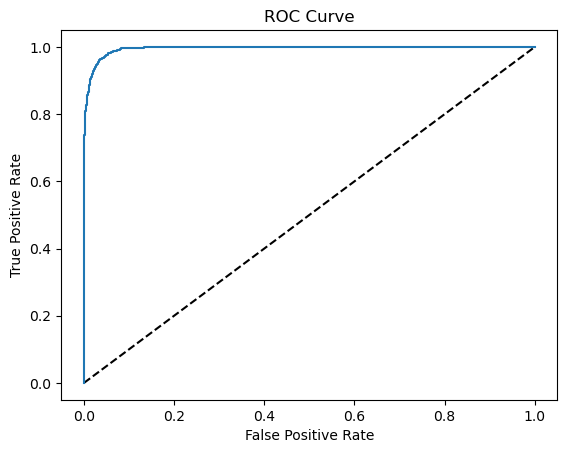

In [36]:
# Generate ROC curve values: fpr, tpr, thresholds

#Predicting proba
y_pred_prob =reg_log.predict_proba(X_test_prep)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Random Forest

In [62]:
# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'), categorical_columns)],
                    remainder='passthrough',
                    verbose_feature_names_out=False
               ).set_output(transform="pandas")

In [63]:
# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [64]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {
    'n_estimators': [150],
    'max_features': [3, 5, 7, 9, 11, 13, 15, 17],
    'max_depth'   : [None, 4, 6, 8, 10, 12],
    'criterion'   : ['gini']
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X=X_train_prep, y=y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex='(param*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
7,gini,None,17,150,0.93,0.01,1.00,0.00
46,gini,12,15,150,0.93,0.01,1.00,0.00
5,gini,None,13,150,0.93,0.01,1.00,0.00
6,gini,None,15,150,0.93,0.01,1.00,0.00


In [65]:
# Mejores hiperparámetros encontrados por validación cruzada
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados por (cv)")
print("--------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

--------------------------------------------
Mejores hiperparámetros encontrados por (cv)
--------------------------------------------
{'criterion': 'gini', 'max_depth': None, 'max_features': 17, 'n_estimators': 150} : 0.9292666666666668 accuracy


In [67]:
# Modelo con los mejores hiperparámetros
# ==============================================================================
modelo_final = grid.best_estimator_
modelo_final

RandomForestClassifier(max_features=17, n_estimators=150, random_state=123)

In [68]:
# Error de test del modelo final
# ==============================================================================
predicciones = modelo_final.predict(X=X_test_prep)

In [69]:
mat_confusion = confusion_matrix(y_true=y_test, y_pred=predicciones)
mat_confusion

array([[3673,  132],
       [ 206,  989]], dtype=int64)

In [70]:
print(classification_report(
        y_true = y_test,
        y_pred = predicciones))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3805
           1       0.88      0.83      0.85      1195

    accuracy                           0.93      5000
   macro avg       0.91      0.90      0.91      5000
weighted avg       0.93      0.93      0.93      5000



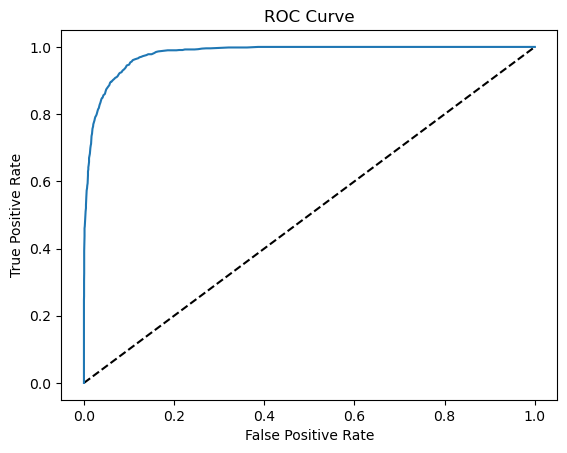

In [71]:
# Generate ROC curve values: fpr, tpr, thresholds

#Predicting proba
y_pred_prob =modelo_final.predict_proba(X_test_prep)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()